# EDA and Sentiment Analysis







In [ ]:
library(tidyverse) # metapackage of all tidyverse packages
library(ggthemes)
library(tidytext)
library(janitor)
library(topicmodels)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.1     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




# Exploratory Data Analysis 
This is an exploratory data analysis for interested persons to understand the cuisines which are most popular in Hyderabad. 




In [ ]:
tbl_res_names <- read_csv("../input/zomato-restaurants-hyderabad/Restaurant names and Metadata.csv") %>%
                clean_names() %>% remove_empty(which = "rows")
tbl_res_reviews <- read_csv("../input/zomato-restaurants-hyderabad/Restaurant reviews.csv", guess_max = 10000) %>% 
                   clean_names() %>% remove_empty(which = "rows")



tbl_res_reviews  <- tbl_res_reviews %>% mutate(rating = str_replace(rating, "Like", "1")) %>% 
                        mutate(rating = as.double(rating))



Parsed with column specification:
cols(
  Name = col_character(),
  Links = col_character(),
  Cost = col_number(),
  Collections = col_character(),
  Cuisines = col_character(),
  Timings = col_character()
)

Parsed with column specification:
cols(
  Restaurant = col_character(),
  Reviewer = col_character(),
  Review = col_character(),
  Rating = col_character(),
  Metadata = col_character(),
  Time = col_character(),
  Pictures = col_double()
)



Saving 12.5 x 6.67 in image



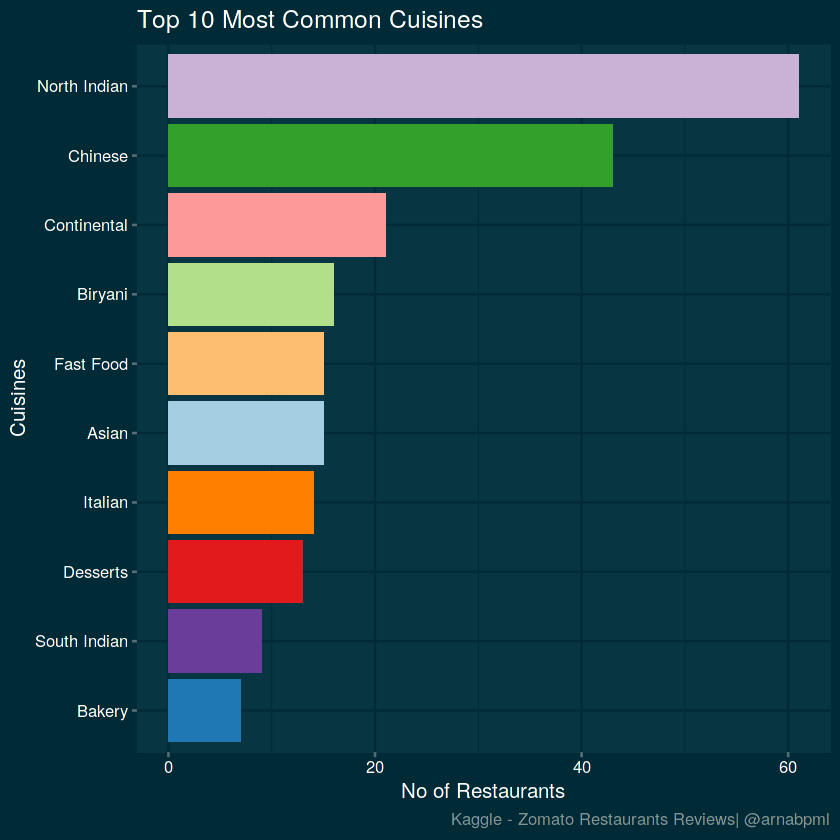

In [ ]:
tbl_res_names_upd1 <- tbl_res_names %>% mutate(new_cuisines = str_replace(cuisines, "North Indian", "NorthIndian"), 
                              new_cuisines = str_replace(new_cuisines, "South Indian", "SouthIndian"),
                              new_cuisines = str_replace(new_cuisines, "Modern Indian", "ModernIndian"),
                              new_cuisines = str_replace(new_cuisines, "Ice Cream", "IceCream"), 
                              new_cuisines = str_replace(new_cuisines, "Street Food", "StreetFood"), 
                              new_cuisines = str_replace(new_cuisines, "Fast Food", "FastFood"))
     
     
tbl_res_names_upd2 <- tbl_res_names_upd1 %>% unnest_tokens(word, new_cuisines, to_lower = FALSE) %>% 
                       anti_join(stop_words, by = "word") 

tbl_res_names_upd3 <- tbl_res_names_upd2 %>% mutate(new_word = str_replace(word, "NorthIndian", "North Indian"), 
                              new_word = str_replace(new_word, "SouthIndian", "South Indian"),
                              new_word = str_replace(new_word, "ModernIndian", "Modern Indian"),
                              new_word = str_replace(new_word, "IceCream", "Ice Cream"), 
                              new_word = str_replace(new_word, "StreetFood", "Street Food"), 
                              new_word = str_replace(new_word, "FastFood", "Fast Food"))

p_common_cuisines  <- tbl_res_names_upd3 %>% count(new_word, sort = TRUE) %>% 
                       top_n(n = 10, wt = n) %>% 
  ggplot() + 
  geom_bar(mapping = aes(x = reorder(new_word, n), y = n, fill = new_word), 
           show.legend = FALSE, 
           stat = "identity") + 
  coord_flip()  + 
  scale_fill_brewer(palette = "Paired") + 
  theme_solarized_2(light = FALSE) + 
  theme(axis.text.x = element_text(color = "white"), 
        axis.text.y = element_text(color = "white"),
        axis.title.x = element_text(color = "white"),
        axis.title.y = element_text(color = "white"), 
        plot.title = element_text(color = "white"),
        legend.text = element_text(color = "white"), 
        legend.title = element_text(color = "white")) + 
  labs(x = "Cuisines", 
       y = "No of Restaurants", 
       caption = "Kaggle - Zomato Restaurants Reviews| @arnabpml") + 
  ggtitle("Top 10 Most Common Cuisines")

p_common_cuisines

ggsave(filename = "Common_Cuisines.png", plot = p_common_cuisines)

It should be no surprise from the graph above that in a city in Southern India North Indian Cuisines are very popular. 

# Sentiment Analysis

* Sentiment Analysis - Mostly Used Positive Sentiment Words in the User Reviews. 
* Sentiment Analysis - Mostly Used Negative Sentiment Words in the User Reviews. 


Saving 12.5 x 6.67 in image



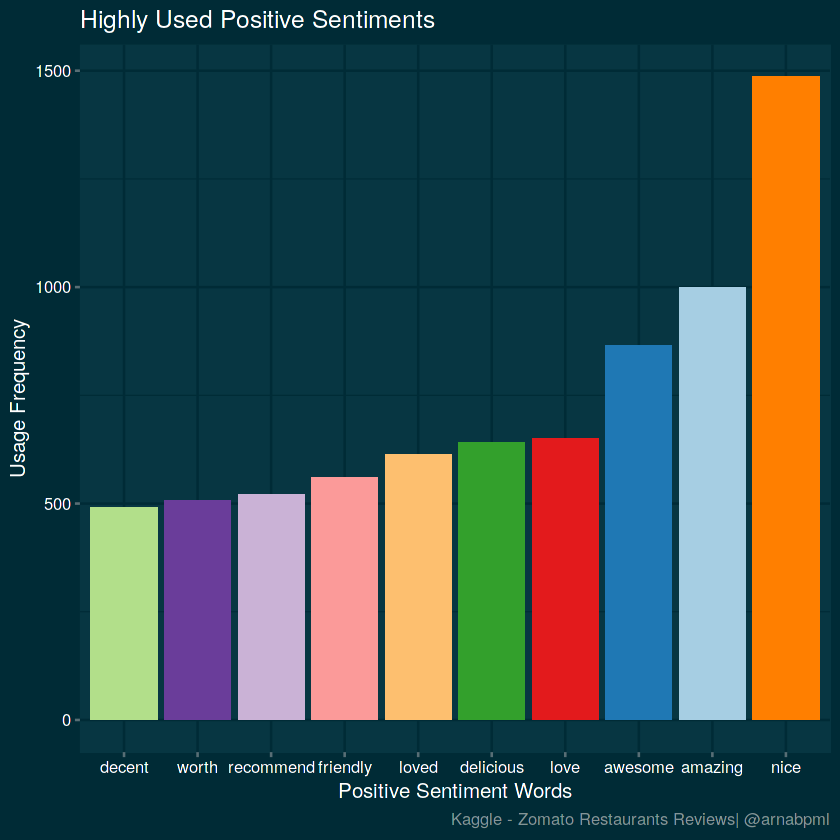

Saving 12.5 x 6.67 in image



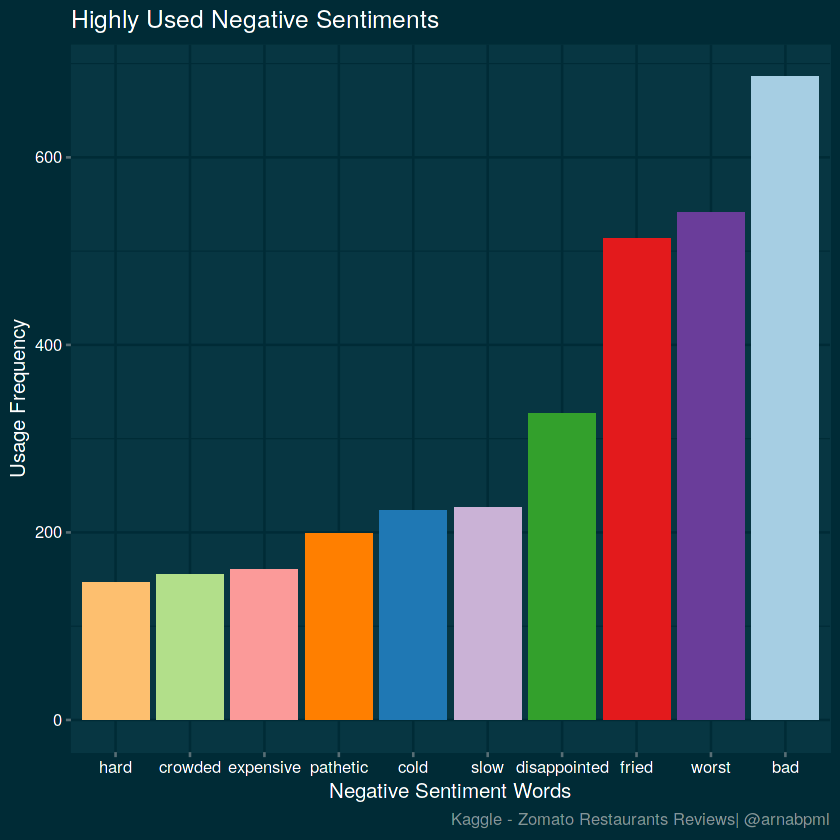

In [ ]:
tbl_res_reviews_upd1 <- tbl_res_reviews %>% unnest_tokens(word, review) %>% 
                    anti_join(stop_words, by = "word")


tbl_bing_sentiments <- get_sentiments("bing")

tbl_tidy_res_reviews <- inner_join(tbl_res_reviews_upd1, 
                                   tbl_bing_sentiments, 
                                   by = "word")

p_positive_sentiments <- tbl_tidy_res_reviews %>% filter(sentiment == "positive") %>% 
  count(word, sort = TRUE) %>% 
  top_n(n = 10, wt = n) %>% 
  ggplot() + geom_bar(mapping = aes(x = reorder(word, n), y = n, fill = word), 
                      show.legend = FALSE, 
                      stat = "identity") + 
  scale_fill_brewer(palette = "Paired") + 
  theme_solarized_2(light = FALSE) + 
  theme(axis.text.x = element_text(color = "white"), 
        axis.text.y = element_text(color = "white"),
        axis.title.x = element_text(color = "white"),
        axis.title.y = element_text(color = "white"), 
        plot.title = element_text(color = "white"),
        legend.text = element_text(color = "white"), 
        legend.title = element_text(color = "white")) + 
  labs(x = "Positive Sentiment Words", 
       y = "Usage Frequency", 
       caption = "Kaggle - Zomato Restaurants Reviews| @arnabpml") + 
  ggtitle("Highly Used Positive Sentiments")


p_positive_sentiments

ggsave(filename = "Positive_Sentiment_Words.png", plot = p_positive_sentiments)

p_negative_sentiments <- tbl_tidy_res_reviews %>% filter(sentiment == "negative") %>% 
  count(word, sort = TRUE) %>% 
  top_n(n = 10, wt = n) %>% 
  ggplot() + geom_bar(mapping = aes(x = reorder(word, n), y = n, fill = word), 
                      show.legend = FALSE, 
                      stat = "identity") + 
  scale_fill_brewer(palette = "Paired") + 
  theme_solarized_2(light = FALSE) + 
  theme(axis.text.x = element_text(color = "white"), 
        axis.text.y = element_text(color = "white"),
        axis.title.x = element_text(color = "white"),
        axis.title.y = element_text(color = "white"), 
        plot.title = element_text(color = "white"),
        legend.text = element_text(color = "white"), 
        legend.title = element_text(color = "white")) + 
  labs(x = "Negative Sentiment Words", 
       y = "Usage Frequency", 
       caption = "Kaggle - Zomato Restaurants Reviews| @arnabpml") + 
  ggtitle("Highly Used Negative Sentiments")


p_negative_sentiments

ggsave(filename = "Negative_Sentiment_Words.png", plot = p_negative_sentiments)

* Nice and Amazing are the two mostly used positive sentiments. 
* Bad and Worst and the two mostly used negative sentiments. 

No wonder we are looking at reviews from Indian Population and these two are very common English Words used in the country

Saving 12.5 x 6.67 in image



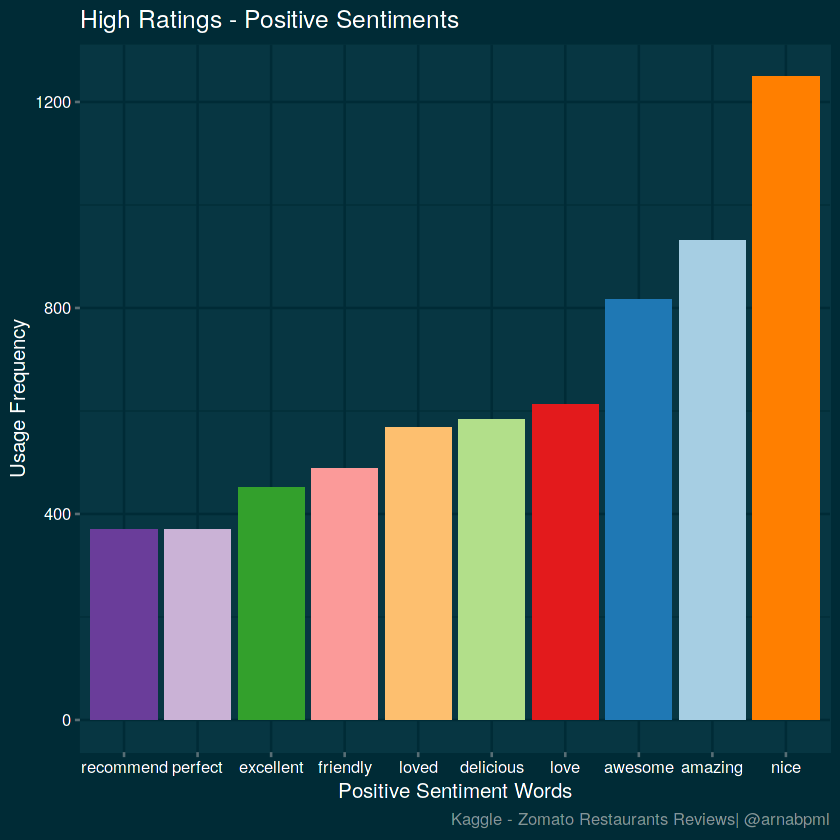

In [ ]:
p_high_reviews <- tbl_tidy_res_reviews %>% filter(rating >= 4) %>%
                         filter(sentiment == "positive") %>% 
                         count(word, sort = TRUE) %>%
                         top_n(n = 10, wt = n) %>% 
  ggplot() + 
  geom_bar(mapping = aes(x = reorder(word, n), y = n, fill = word), 
           show.legend = FALSE, 
           stat = "identity") + 
  scale_fill_brewer(palette = "Paired") + 
  theme_solarized_2(light = FALSE) + 
  theme(axis.text.x = element_text(color = "white"), 
        axis.text.y = element_text(color = "white"),
        axis.title.x = element_text(color = "white"),
        axis.title.y = element_text(color = "white"), 
        plot.title = element_text(color = "white"),
        legend.text = element_text(color = "white"), 
        legend.title = element_text(color = "white")) + 
  labs(x = "Positive Sentiment Words", 
       y = "Usage Frequency", 
       caption = "Kaggle - Zomato Restaurants Reviews| @arnabpml") + 
  ggtitle("High Ratings - Positive Sentiments")


p_high_reviews

ggsave(filename = "High_Ratings_Positive_Sentiments.png", plot = p_high_reviews)

Saving 12.5 x 6.67 in image



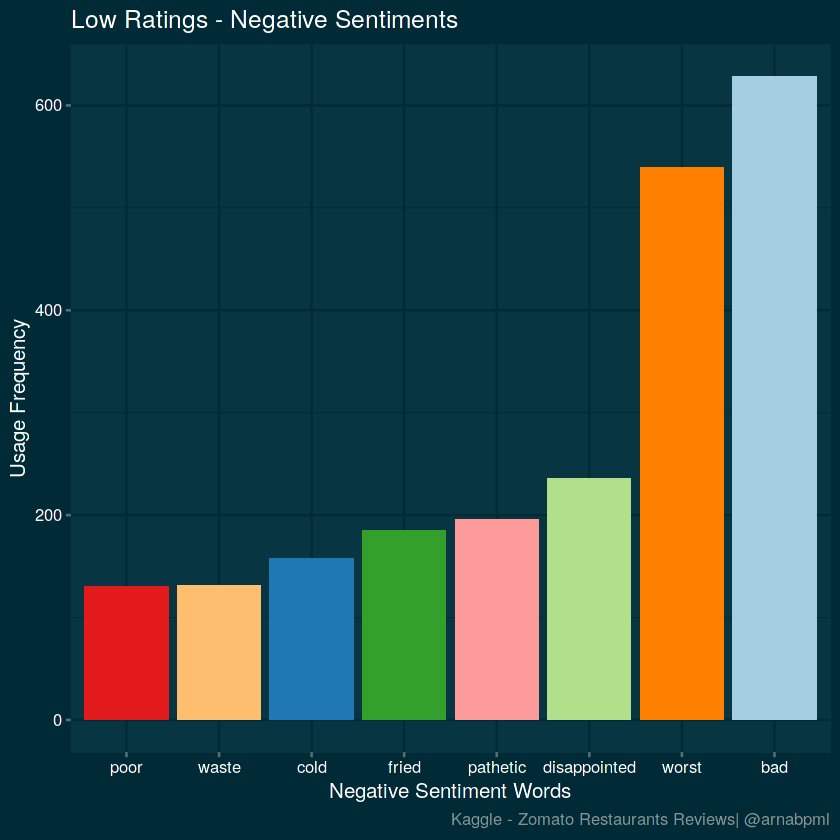

In [ ]:
p_low_reviews <- tbl_tidy_res_reviews %>% filter(rating < 4) %>%
  filter(sentiment == "negative") %>% 
  count(word, sort = TRUE) %>%
  top_n(n = 8, wt = n) %>% 
  ggplot() + 
  geom_bar(mapping = aes(x = reorder(word, n), y = n, fill = word), 
           show.legend = FALSE, 
           stat = "identity") + 
  scale_fill_brewer(palette = "Paired") + 
  theme_solarized_2(light = FALSE) + 
  theme(axis.text.x = element_text(color = "white"), 
        axis.text.y = element_text(color = "white"),
        axis.title.x = element_text(color = "white"),
        axis.title.y = element_text(color = "white"), 
        plot.title = element_text(color = "white"),
        legend.text = element_text(color = "white"), 
        legend.title = element_text(color = "white")) + 
  labs(x = "Negative Sentiment Words", 
       y = "Usage Frequency", 
       caption = "Kaggle - Zomato Restaurants Reviews| @arnabpml") + 
  ggtitle("Low Ratings - Negative Sentiments")


p_low_reviews

ggsave(filename = "Low_Ratings_Negative_Sentiments.png", plot = p_low_reviews)


The higher ratings have the correct positive sentiments. The lower ratings have the correct negative sentiments. 

`summarise()` regrouping output by 'restaurant' (override with `.groups` argument)

Saving 12.5 x 6.67 in image



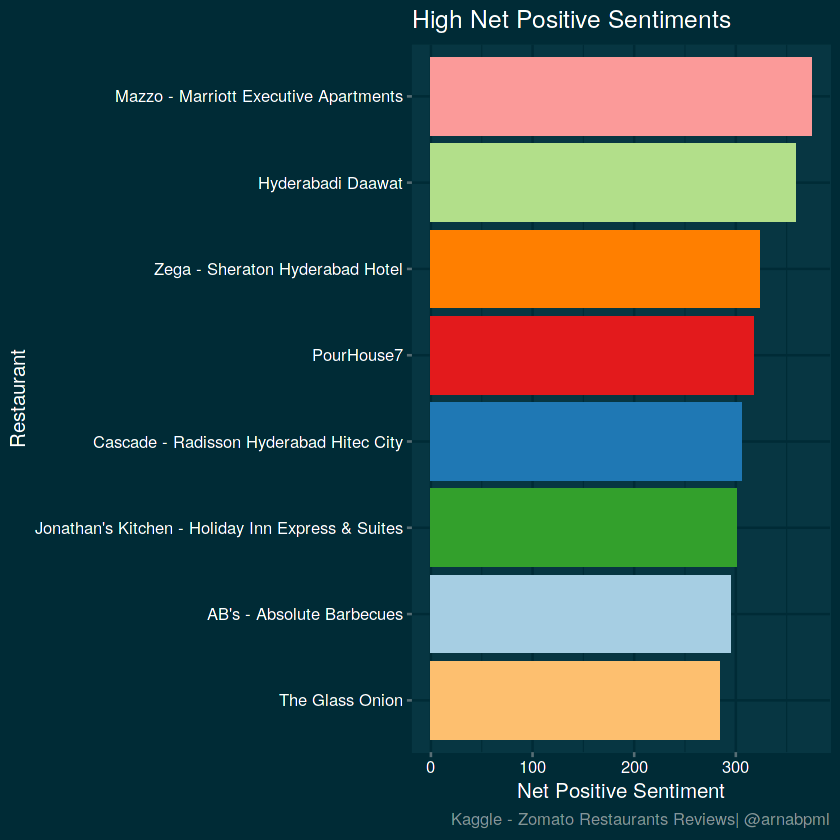

Saving 12.5 x 6.67 in image



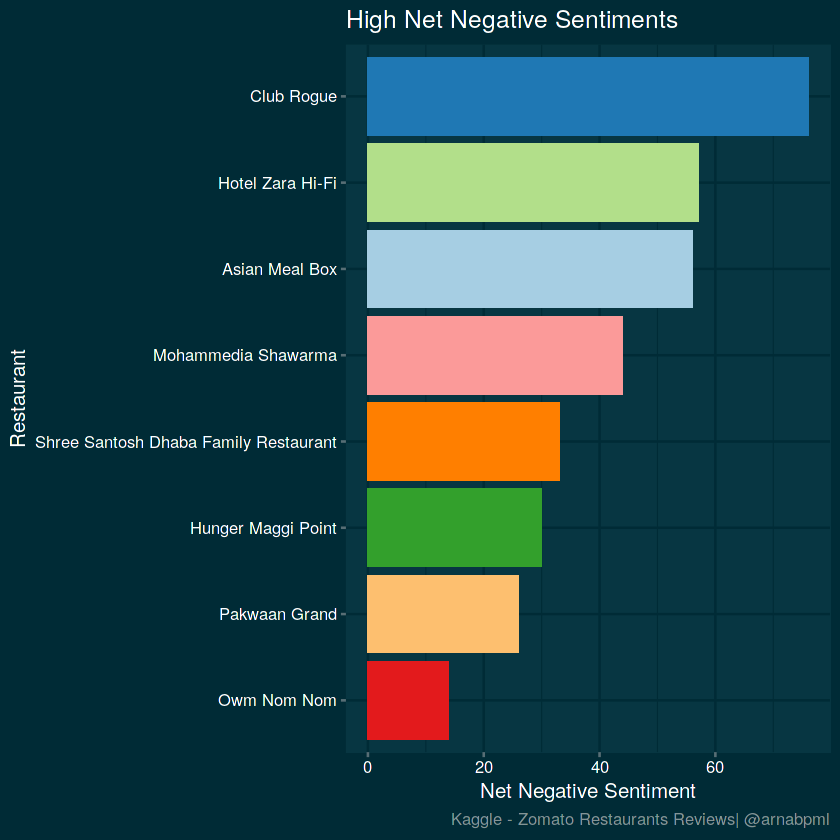

In [ ]:
tbl_tidy_net_sentiments <- tbl_tidy_res_reviews %>% select(restaurant, 
                                rating, 
                                word, 
                                sentiment) %>% 
                        group_by(restaurant, sentiment) %>%
                        summarise(cnt = n()) %>% 
                        ungroup() %>% 
                        pivot_wider(names_from = sentiment, 
                                    values_from = cnt) %>% 
                        mutate(net_pos_sentiment = positive - negative, 
                               net_neg_sentiment = negative - positive)



p_high_net_pos_sentiments <- tbl_tidy_net_sentiments %>% top_n(n = 8, wt = net_pos_sentiment) %>%
  ggplot() + geom_bar(mapping = aes(x = reorder(restaurant, net_pos_sentiment), 
                                    y = net_pos_sentiment, 
                                    fill = restaurant), 
                      show.legend = FALSE, 
                      stat = "identity") + 
  coord_flip() + 
  scale_fill_brewer(palette = "Paired") + 
  theme_solarized_2(light = FALSE) + 
  theme(axis.text.x = element_text(color = "white"), 
        axis.text.y = element_text(color = "white"),
        axis.title.x = element_text(color = "white"),
        axis.title.y = element_text(color = "white"), 
        plot.title = element_text(color = "white"),
        legend.text = element_text(color = "white"), 
        legend.title = element_text(color = "white")) + 
  labs(x = "Restaurant", 
       y = "Net Positive Sentiment", 
       caption = "Kaggle - Zomato Restaurants Reviews| @arnabpml") + 
  ggtitle("High Net Positive Sentiments")

p_high_net_pos_sentiments

ggsave(filename = "Restaurants_High_Net_Positive_Sentiments.png", plot = p_high_net_pos_sentiments)


p_high_net_neg_sentiments <- tbl_tidy_net_sentiments %>% 
                            top_n(n = 8, wt = net_neg_sentiment) %>% 
  ggplot() + geom_bar(mapping = aes(x = reorder(restaurant, net_neg_sentiment), 
                                    y = net_neg_sentiment, 
                                    fill = restaurant), 
                      show.legend = FALSE, 
                      stat = "identity") + 
  coord_flip() + 
  scale_fill_brewer(palette = "Paired") + 
  theme_solarized_2(light = FALSE) + 
  theme(axis.text.x = element_text(color = "white"), 
        axis.text.y = element_text(color = "white"),
        axis.title.x = element_text(color = "white"),
        axis.title.y = element_text(color = "white"), 
        plot.title = element_text(color = "white"),
        legend.text = element_text(color = "white"), 
        legend.title = element_text(color = "white")) + 
  labs(x = "Restaurant", 
       y = "Net Negative Sentiment", 
       caption = "Kaggle - Zomato Restaurants Reviews| @arnabpml") + 
  ggtitle("High Net Negative Sentiments")

p_high_net_neg_sentiments

ggsave(filename = "Restaurants_High_Net_Negative_Sentiments.png", plot = p_high_net_neg_sentiments)

The above two graphs clearly indicate which Restaurants customers are mostly happy with and which the customers are least happy with. The sentiments from the previous visualizations also indicate the reasons why the customers are happy or displeased. 

# Cost - Sentiment Correlation Analysis

The following section will deal with the visualization and study to understand if there is any correlation between the cost of the restaurants of the sentiments of the reviews

Saving 12.5 x 6.67 in image



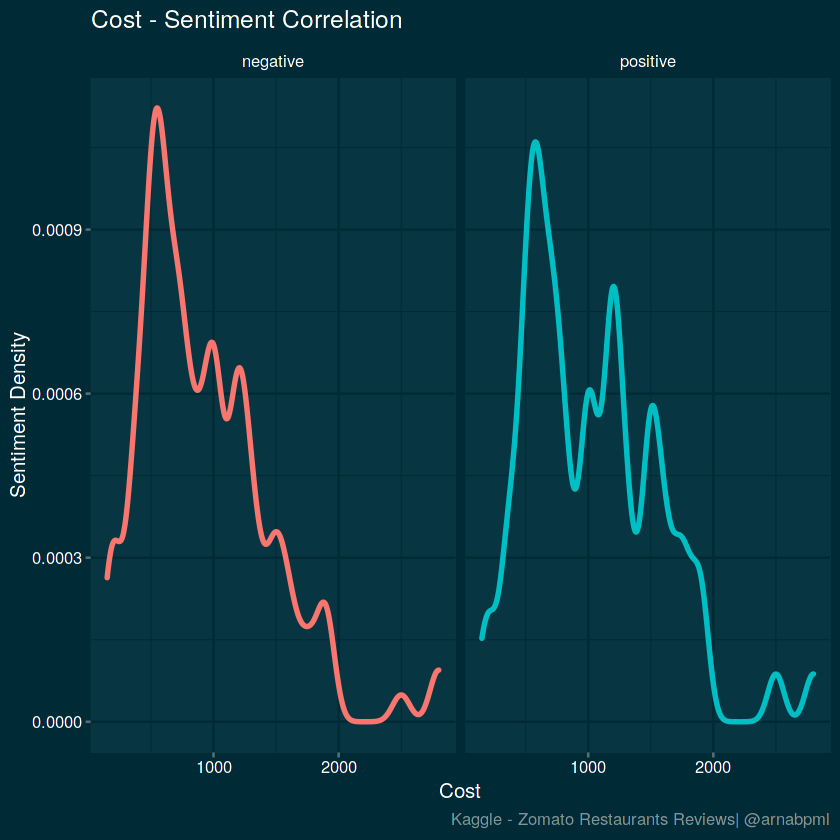

In [ ]:
tbl_cost_sentiments <- inner_join(tbl_tidy_res_reviews %>% 
  select(restaurant, 
         rating, 
         word, 
         sentiment, 
         ), 
tbl_res_names %>% transmute(restaurant = name, 
                            cost = cost), by = "restaurant")

p_cost_sentiment_correlation <- tbl_cost_sentiments %>% 
  ggplot() + 
  geom_density(mapping = aes(x = cost, colour = sentiment), 
               show.legend = FALSE, 
               na.rm = TRUE, 
               size = 1.15) + 
  facet_wrap(~sentiment) + 
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE)) + 
  theme_solarized_2(light = FALSE) + 
  theme(axis.text.x = element_text(color = "white"), 
        axis.text.y = element_text(color = "white"),
        axis.title.x = element_text(color = "white"),
        axis.title.y = element_text(color = "white"), 
        plot.title = element_text(color = "white"),
        strip.text = element_text(color = "white"),
        legend.text = element_text(color = "white"), 
        legend.title = element_text(color = "white")) + 
  labs(x = "Cost", 
       y = "Sentiment Density", 
       caption = "Kaggle - Zomato Restaurants Reviews| @arnabpml") + 
  ggtitle("Cost - Sentiment Correlation")


p_cost_sentiment_correlation
                     
ggsave(filename = "Cost_Sentiment_Correlation.png", plot = p_cost_sentiment_correlation)                  

The above facet wrap graph shows negative sentiments have a steady decline with the cost. The decline quite steep. There is no abrupt incline when the cost increases. This indicates as costs go up customers generally have lower negative sentiments. 
The positive sentiment on the other hand peaks at cost range of 500-600 (this same range also has peak negative sentiments - meaning that in this range there is an equal probability of customers being happy as well as unhappy) and then again the positive sentiments peaks in the cost range of 1200 and 1500. It is in these cost ranges i.e. 1200 and 1500 the positive sentiments considerably outweigh the negative sentiments. This indicates restaurants in the cost range of 1200 to 1500 have the best NET positive sentiments. 



# Bi-Gram Analysis of User Reviews

We now focus on the bi-gram analysis of the user reviews to understand which words have caused opposite sentiments and under which category these opposing sentiments have been 

`summarise()` regrouping output by 'word1' (override with `.groups` argument)

Saving 12.5 x 6.67 in image



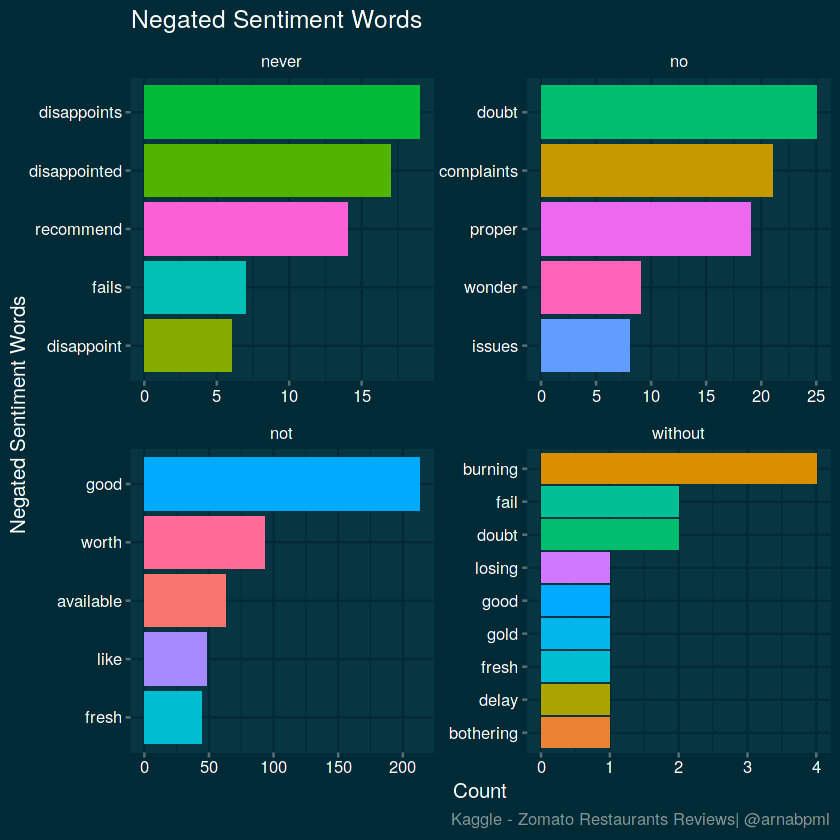

In [ ]:
tbl_res_reviews_bigrams <- tbl_res_reviews %>% 
  unnest_tokens(bigram, review, token = "ngrams", n = 2)

tbl_bigrams_separated <- tbl_res_reviews_bigrams %>%
                     separate(bigram, c("word1", "word2"), sep = " ")


tbl_bigrams_filtered <- tbl_bigrams_separated %>% 
                    filter(!word1 %in% stop_words$word) %>% 
                    filter(!word2 %in% stop_words$word)

c_negation_words <- c("no", "not", "never", "without")

tbl_negated_sentiments <- tbl_bigrams_separated %>% filter(word1 %in% c_negation_words) %>%
                          inner_join(tbl_bing_sentiments, by = c(word2 = "word")) 




tbl_negated_sentiment_words <- tbl_negated_sentiments %>% group_by(word1, word2) %>%
  summarise(cnt = n()) %>% 
  mutate(rown = dense_rank(-cnt)) 


p_negated_sentiment_words <- tbl_negated_sentiment_words %>%
                            filter(rown <= 5) %>%
                            arrange(word1, desc(cnt)) %>%  
                          ggplot() + 
                          geom_bar(mapping = aes(x = reorder_within(word2, cnt, word1), 
                                                 y = cnt, 
                                                 fill = word2), 
                                   stat = "identity", 
                                   show.legend = FALSE) + 
                          scale_x_reordered() +
                          coord_flip() +
                          facet_wrap(~word1, scales = "free")  + 
  theme_solarized_2(light = FALSE) + 
  theme(axis.text.x = element_text(color = "white"), 
        axis.text.y = element_text(color = "white"),
        axis.title.x = element_text(color = "white"),
        axis.title.y = element_text(color = "white"), 
        plot.title = element_text(color = "white"),
        strip.text = element_text(color = "white"),
        legend.text = element_text(color = "white"), 
        legend.title = element_text(color = "white")) + 
  labs(x = "Negated Sentiment Words", 
       y = "Count", 
       caption = "Kaggle - Zomato Restaurants Reviews| @arnabpml") + 
  ggtitle("Negated Sentiment Words")


p_negated_sentiment_words

ggsave(filename = "Negated_Sentiment_Words.png", plot = p_negated_sentiment_words)   



The above graph shows the different categories where the positive sentiment words have eventually got negated. 

We now factor the above stats into account and see how the Top 10 Sentiment Words have changed the overall stats. Have the most frequently used positive sentiments undergone a radical shift in numbers due to the bi-gram analysis ? The below analysis will indicate. 

`summarise()` regrouping output by 'word' (override with `.groups` argument)

`summarise()` regrouping output by 'word' (override with `.groups` argument)

Saving 12.5 x 6.67 in image



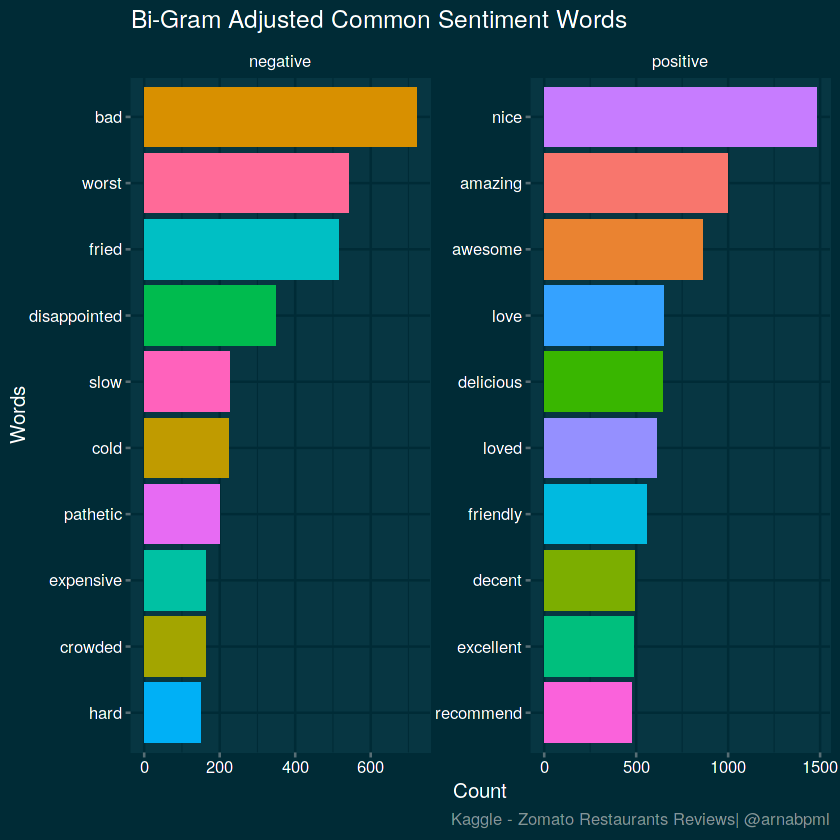

In [ ]:
tbl_opposite_sentiments <- tbl_negated_sentiments %>% count(restaurant, word1, word2, sentiment) %>% 
  transmute(restaurant = restaurant, 
            word = word2, 
            sentiment = sentiment, 
            net_value = if_else(sentiment == "positive", -n, n))

tbl_adjusted_sentiments <- left_join(
tbl_tidy_res_reviews %>% count(word, sentiment), 
tbl_opposite_sentiments %>% group_by(word, sentiment) %>% 
  summarise(n = sum(net_value)) %>%
  ungroup(),
by = c("word", "sentiment")) %>% 
  transmute(word = word, 
            sentiment = sentiment, 
            org_value = n.x, 
            oppostite_value = replace_na(n.y, 0), 
            adj_value = org_value + oppostite_value)


p_bi_gram_adj_counts <- tbl_adjusted_sentiments %>% group_by(word, sentiment) %>% 
  summarise(cnt = sum(adj_value)) %>%
  ungroup() %>%
  group_by(sentiment) %>%
  mutate(rown = dense_rank(-cnt)) %>%
  arrange(sentiment, rown) %>% 
  filter(rown <= 10) %>% 
  ggplot() + geom_bar(mapping = aes(x = reorder(word, cnt), 
                                    y = cnt, 
                                    fill = word), 
                      stat = "identity", 
                      show.legend = FALSE) + 
  facet_wrap(~sentiment, scales = "free") + 
  coord_flip() + 
  theme_solarized_2(light = FALSE) + 
  theme(axis.text.x = element_text(color = "white"), 
        axis.text.y = element_text(color = "white"),
        axis.title.x = element_text(color = "white"),
        axis.title.y = element_text(color = "white"), 
        plot.title = element_text(color = "white"),
        strip.text = element_text(color = "white"),
        legend.text = element_text(color = "white"), 
        legend.title = element_text(color = "white")) + 
  labs(x = "Words", 
       y = "Count", 
       caption = "Kaggle - Zomato Restaurants Reviews| @arnabpml") + 
  ggtitle("Bi-Gram Adjusted Common Sentiment Words")

p_bi_gram_adj_counts

ggsave(filename = "Bi_Gram_Adj_Popular_Sentiments.png", plot = p_bi_gram_adj_counts) 

**Conclusion of the bi-gram analysis** :- If we now compare the unadjusted positive and negative sentiments with the above bi-gram adjusted sentiments we can see though in some cases the overall impact of a sentiment has come down/or increased but the most common sentiments and their impact have not altered significantly. 


# Topic Modelling using LDA 

We now attempt to understand topic of the user reviews. We will be using the LDA Method to attempt Topic Modelling. The K for the method is taken be 2 a-priori which means we try to seggregate the user reviews into two topics and then analyze and visualize each of the topics. 

In [ ]:
reviews_dtm <- tbl_res_reviews_upd1 %>% 
  count(restaurant, word, sort = TRUE) %>%
  cast_dtm(document = restaurant, term = word, value = n)

reviews_lda <- LDA(x = reviews_dtm, k = 2, control = list(seed = 1234))

tbl_reviews_word_topics <- as_tibble(tidy(x = reviews_lda, matrix = "beta"))


Warning message:
“`tbl_df()` is deprecated as of dplyr 1.0.0.
Please use `tibble::as_tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


As can be seen above the reviews have been broken down into 2 topics. We will now study the probabilities of words appearing in which topics and visualize the words with highest probabilities in each of the topics

Saving 12.5 x 6.67 in image



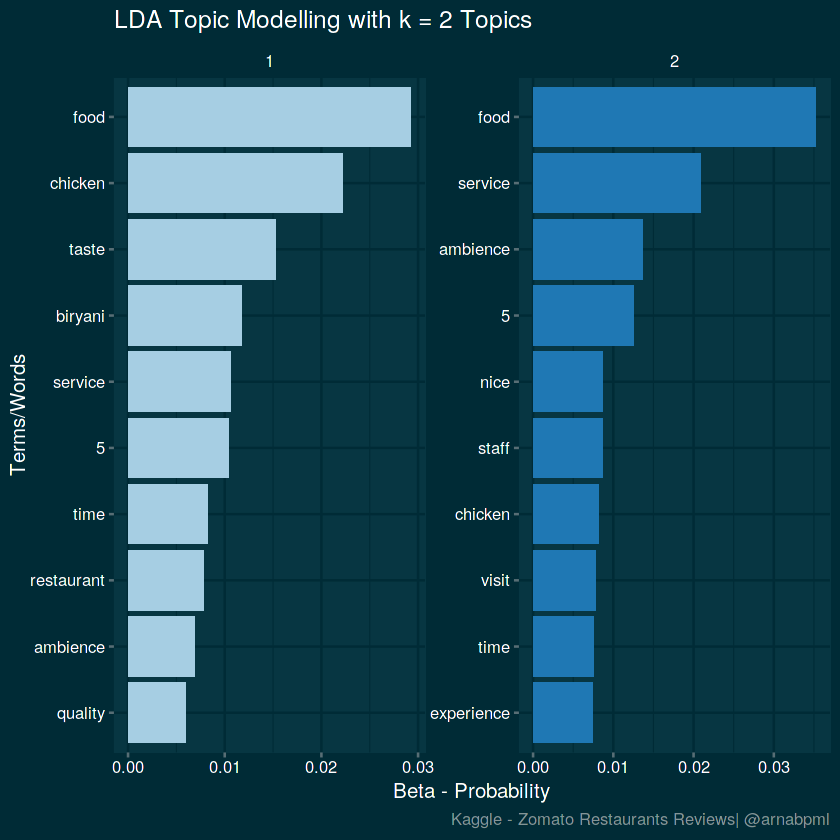

In [ ]:
tbl_reviews_top_terms_used <- tbl_reviews_word_topics %>% 
                              group_by(topic) %>%
                              top_n(n = 10, wt = beta) %>% 
                              ungroup() %>%
                              arrange(topic, desc(beta))


p_word_topic_probs <- tbl_reviews_top_terms_used %>% 
  ggplot(mapping = aes(x = reorder_within(term, beta, topic), 
                       y = beta, 
                       fill = as.factor(topic))) + 
  geom_col(show.legend = FALSE) + 
  facet_wrap(~topic, scales = "free") + 
  scale_x_reordered() + 
  coord_flip() + 
  scale_fill_brewer(palette = "Paired") + 
  theme_solarized_2(light = FALSE) + 
  theme(axis.text.x = element_text(color = "white"), 
        axis.text.y = element_text(color = "white"),
        axis.title.x = element_text(color = "white"),
        axis.title.y = element_text(color = "white"), 
        plot.title = element_text(color = "white"),
        strip.text = element_text(color = "white"),
        legend.text = element_text(color = "white"), 
        legend.title = element_text(color = "white")) + 
  labs(x = "Terms/Words", 
       y = "Beta - Probability", 
       caption = "Kaggle - Zomato Restaurants Reviews| @arnabpml") + 
  ggtitle("LDA Topic Modelling with k = 2 Topics")

  

p_word_topic_probs

ggsave(filename = "LDA_Word_Topic_Probabilities.png", plot = p_word_topic_probs)


As can be seen above the word in both the topics are quite common. This gives us an idea the topics of the reviews and the terms reviewers have stressed upon and given their review about. This visualization would give an idea about the parameters that can lead to a greater customer satisfaction. The number 5 (which I believe) is the rating and it has appeared in both the topics and it does indicate the attaining a 5-rating is a goal. Among the specific foods chicken and biriyani feature as important parts of the topic. 

The next section proceeds to undertand the document topic probabilities. Here the restaurants each are considered as a document. We will try and find out which restaurants have featured in Topic 1 more and which restaurants have featured in Topic 2 more. This would help us understands the primary topic of reviews and hence the terms of the review for these restaurants

In [ ]:
tbl_reviews_doc_topics <- as_tibble(tidy(x = reviews_lda, matrix = "gamma"))

tbl_restautant_topic_rankings <- tbl_reviews_doc_topics %>% pivot_wider(names_from = topic, 
                                       names_prefix = "topic_", 
                                       values_from = gamma) %>% 
                          transmute(restaurant = document, 
                                    topic_1 = topic_1, 
                                    topic_2 = topic_2, 
                                    topic_1_more = topic_1 - topic_2, 
                                    topic_2_more = topic_2 - topic_1, 
                                    rown_topic1_more = row_number(topic_1_more),
                                    rown_topic2_more = row_number(topic_2_more)
                                    )

tbl_restautant_topic_rankings %>% top_n(n = 10, wt = rown_topic1_more) %>%
                                  select(restaurant_topic1_more = restaurant)



tbl_restautant_topic_rankings %>% top_n(n = 10, wt = rown_topic2_more) %>%
                                  select(restaurant_topic2_more = restaurant)

restaurant_topic1_more
<chr>
American Wild Wings
Zing's Northeast Kitchen
Chinese Pavilion
Shanghai Chef 2
Hyderabadi Daawat
Driven Cafe
Pista House
Karachi Cafe
Cafe Eclat


restaurant_topic2_more
<chr>
The Fisherman's Wharf
Feast - Sheraton Hyderabad Hotel
Zega - Sheraton Hyderabad Hotel
10 Downing Street
Mazzo - Marriott Executive Apartments
The Tilt Bar Republic
La La Land - Bar & Kitchen
Prism Club & Kitchen
Tiki Shack


As can be seen the first set 10 restaurants are the ones which have figured in Topic 1 review more than Topic 2 and the second set of 10 restaurants are the ones which have figured in Topic 2 review more than Topic 1

All the above visualizations are stored in the Notebook and can be used for reference and further study and investigation